In [207]:
import pandas as pd

order_simple_QA = pd.read_csv('/Users/kohjunkai/Desktop/order_simple_QA.csv')
order_COT = pd.read_csv('/Users/kohjunkai/Desktop/order_COT.csv')
order_self_critique = pd.read_csv('/Users/kohjunkai/Desktop/order_self_critique.csv')

step_simple_QA = pd.read_csv('/Users/kohjunkai/Desktop/step_simple_QA.csv')
step_COT = pd.read_csv('/Users/kohjunkai/Desktop/step_COT.csv')
step_self_critique = pd.read_csv('/Users/kohjunkai/Desktop/step_self_critique.csv')

goal_simple_QA = pd.read_csv('/Users/kohjunkai/Desktop/goal_simple_QA.csv')
goal_COT = pd.read_csv('/Users/kohjunkai/Desktop/goal_COT.csv')
goal_self_critique = pd.read_csv('/Users/kohjunkai/Desktop/goal_self_critique.csv')

plausibility_simple_QA = pd.read_csv('/Users/kohjunkai/Desktop/plausibility_simple_QA.csv')
plausibility_COT = pd.read_csv('/Users/kohjunkai/Desktop/plausibility_COT.csv')
plausibility_self_critique = pd.read_csv('/Users/kohjunkai/Desktop/plausibility_self_critique.csv')
plausibility_simple_QA["Typicality"] = plausibility_simple_QA['Typicality'].map({"Typical (7)": 7, "Atypical (1)": 1})
plausibility_COT["Typicality"] = plausibility_COT['Typicality'].map({"Typical (7)": 7, "Atypical (1)": 1})
plausibility_self_critique["Typicality"] = plausibility_self_critique['Typicality'].map({"Typical (7)": 7, "Atypical (1)": 1})



In [278]:
def evaluate_df(df):
    model_list = ["llama2","mistral", "orca-mini:7b", "qwen:7b"]
    evaluation = {}
    for model_name in model_list:
        results = df[model_name].str.strip().str[0]
        correct_predictions = (df['label'] == results).sum()
        total_predictions = len(df)
        accuracy = correct_predictions / total_predictions
        evaluation[model_name] = accuracy * 100
    print(evaluation)
    return evaluation 

In [279]:
order_simple_QA_results = evaluate_df(order_simple_QA)
order_COT_results = evaluate_df(order_COT)
order_self_critique_results = evaluate_df(order_self_critique)
step_simple_QA_results = evaluate_df(step_simple_QA)
step_COT_results = evaluate_df(step_COT)
step_self_critique_results = evaluate_df(step_self_critique)
goal_simple_QA_results = evaluate_df(goal_simple_QA)
goal_COT_results = evaluate_df(goal_COT)
goal_self_critique_results = evaluate_df(goal_self_critique)

{'llama2': 58.57142857142858, 'mistral': 62.857142857142854, 'orca-mini:7b': 52.0, 'qwen:7b': 68.57142857142857}
{'llama2': 62.857142857142854, 'mistral': 72.28571428571429, 'orca-mini:7b': 56.285714285714285, 'qwen:7b': 66.85714285714286}
{'llama2': 55.00000000000001, 'mistral': 67.5, 'orca-mini:7b': 63.0, 'qwen:7b': 57.99999999999999}
{'llama2': 44.857142857142854, 'mistral': 55.42857142857143, 'orca-mini:7b': 32.857142857142854, 'qwen:7b': 48.0}
{'llama2': 54.285714285714285, 'mistral': 64.0, 'orca-mini:7b': 40.0, 'qwen:7b': 48.0}
{'llama2': 34.5, 'mistral': 64.5, 'orca-mini:7b': 47.0, 'qwen:7b': 35.5}
{'llama2': 45.14285714285714, 'mistral': 61.142857142857146, 'orca-mini:7b': 54.285714285714285, 'qwen:7b': 56.285714285714285}
{'llama2': 44.857142857142854, 'mistral': 61.142857142857146, 'orca-mini:7b': 56.285714285714285, 'qwen:7b': 61.142857142857146}
{'llama2': 28.000000000000004, 'mistral': 63.5, 'orca-mini:7b': 53.5, 'qwen:7b': 44.5}


In [280]:
order = pd.read_csv('./datasets_human_readable/order_test.csv')
order['label'] = order['label'].map({0:'A', 1:'B'})
step = pd.read_csv('./datasets_human_readable/step_test.csv', encoding='ISO-8859-1')
step['label'] = step['label'].map({0:'A', 1:'B',2:"C",3:"D"})
goal = pd.read_csv('./datasets_human_readable/goal_test.csv', encoding='ISO-8859-1')
goal['label'] = goal['label'].map({0:'A', 1:'B',2:"C",3:"D"})

accuracy = (order["label"].iloc[:100] == order["Human Evaluation"].iloc[:100]).mean()
print(f"order accuracy: {accuracy}")

accuracy = (step["label"].iloc[:100] == step["Human Evaluation"].iloc[:100]).mean()
print(f"step accuracy: {accuracy}")

accuracy = (goal["label"].iloc[:100] == goal["Human Evaluation"].iloc[:100]).mean()
print(f"goal accuracy: {accuracy}")


order accuracy: 0.94
step accuracy: 0.98
goal accuracy: 0.9


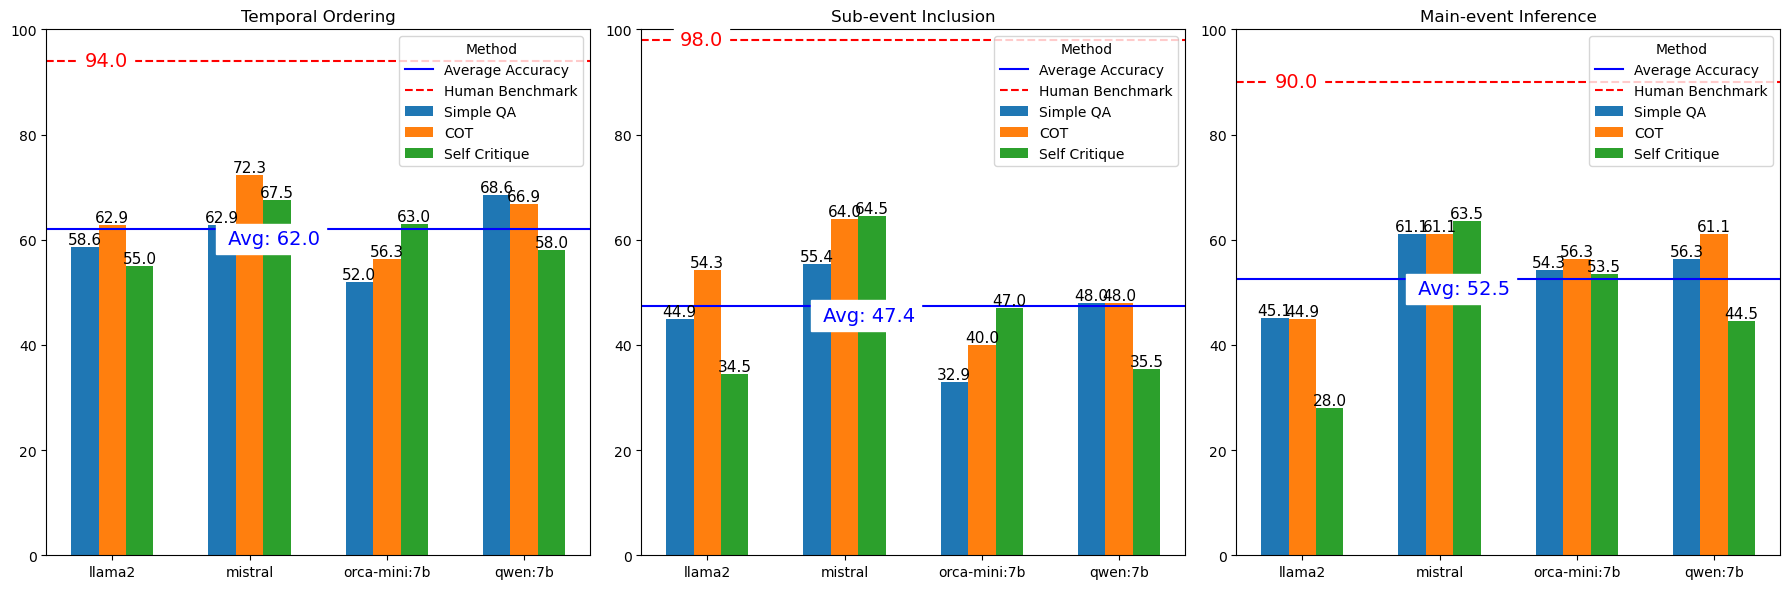

In [285]:
import numpy as np
import matplotlib.pyplot as plt

# Data organized by task and model
tasks = ['Simple QA', 'COT', 'Self Critique']
categories = ['Temporal Ordering', 'Sub-event Inclusion', 'Main-event Inference']
models = ['llama2', 'mistral', 'orca-mini:7b', 'qwen:7b']

# Scores by category, then by task
scores = {
    'Temporal Ordering': {
        'Simple QA': list(order_simple_QA_results.values()),
        'COT': list(order_COT_results.values()),
        'Self Critique': list(order_self_critique_results.values()),
    },
    'Sub-event Inclusion': {
        'Simple QA': list(step_simple_QA_results.values()),
        'COT': list(step_COT_results.values()),
        'Self Critique': list(step_self_critique_results.values()),
    },
    'Main-event Inference': {
        'Simple QA': list(goal_simple_QA_results.values()),
        'COT': list(goal_COT_results.values()),
        'Self Critique': list(goal_self_critique_results.values()),
    }
}

# Set up the plot
fig, axs = plt.subplots(1, len(categories), figsize=(18, 6))

# Bar width
bar_width = 0.2

for i, category in enumerate(categories):
    for j, task in enumerate(tasks):
        positions = np.arange(len(models)) + j * bar_width
        bars = axs[i].bar(positions, scores[category][task], width=bar_width, label=task)
        
        # Adding annotations
        for bar in bars:
            height = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width() / 2., height, f'{height:.1f}', ha='center', va='bottom', fontsize=11)
        
        # Calculate the average score for each task within the category, then average those to get the category average
        category_scores = [scores[category][task] for task in tasks]
        category_average = np.mean([np.mean(task_scores) for task_scores in category_scores])

    # Draw a solid blue line for the average accuracy score within the category
    axs[i].axhline(y=category_average, color='b', linestyle='-', label='Average Accuracy')
    
    # Add the numerical label for the average accuracy
    axs[i].text(1, category_average, f' Avg: {category_average:.1f}', 
                ha='left', va='top', color='b', fontsize=14, backgroundcolor='w')

    axs[i].set_title(category)
    axs[i].set_xticks(np.arange(len(models)) + bar_width)
    axs[i].set_xticklabels(models)
    axs[i].legend(title='Method')
    axs[i].set_ylim(0, 100)
    
human_benchmark = {
    'Temporal Ordering': 94,
    'Sub-event Inclusion': 98,
    'Main-event Inference': 90
}

for i, category in enumerate(categories):
    axs[i].axhline(y=human_benchmark[category], color='r', linestyle='--', label='Human Benchmark')
    axs[i].text(0, human_benchmark[category], f'{human_benchmark[category]:.1f}', 
                ha='left', va='center', color='r', fontsize=14, backgroundcolor='w')

    axs[i].legend(title='Method')
plt.tight_layout()
# plt.show()
plt.savefig("model_comparison_graph.png")


In [160]:
import pandas as pd

def evaluate_plausibility(df):
    model_list = ["llama2", "mistral", "orca-mini:7b", "qwen:7b"]
    evaluation = {model: {'correct': 0, 'valid': 0, "absolute error vs human": 0} for model in model_list}
    
    for index, row in df.iterrows():
        typicality = row['Typicality']
        human_score = row['Rating']
        for model_name in model_list:
            model_score = pd.to_numeric(row[model_name], errors='coerce')
            if not pd.isna(model_score):  # Check if model_score is a number
                if typicality == 1 and 1 <= model_score < 4:
                    evaluation[model_name]['correct'] += 1
                elif typicality == 7 and 4 < model_score <= 7:
                    evaluation[model_name]['correct'] += 1    
                evaluation[model_name]['absolute error vs human'] += abs(model_score - human_score)
                evaluation[model_name]['valid'] += 1
       
    
    # Calculate accuracy or correctness percentage for each model
    for model_name in model_list:
        if evaluation[model_name]['valid'] > 0:
            accuracy = (evaluation[model_name]['correct'] / evaluation[model_name]['valid']) * 100
            evaluation[model_name]['accuracy'] = accuracy
            evaluation[model_name]['human mae'] = evaluation[model_name]['absolute error vs human'] / evaluation[model_name]['valid']
        else:
            evaluation[model_name]['accuracy'] = None
        evaluation[model_name]["classification_eror"] = (1- (evaluation[model_name]['valid'] / len(df.index)))  * 100        
    
    
    return evaluation

In [230]:
plausibility = pd.read_csv('./newformat_curated_human_ratings.csv')
atypical_condition = (plausibility['Typicality'] == 'AT') & (plausibility['Rating'] >= 1) & (plausibility['Rating'] < 4)
typical_condition = (plausibility['Typicality'] == 'T') & (plausibility['Rating'] > 4) & (plausibility['Rating'] <= 7)

all_entries_meet_requirements = atypical_condition | typical_condition

percentage_meeting_requirements = all_entries_meet_requirements.mean() * 100

percentage_meeting_requirements

94.33249370277078

In [161]:
plausibility_simple_QA_results = evaluate_plausibility(plausibility_simple_QA)
plausibility_COT_results = evaluate_plausibility(plausibility_COT)
plausibility_self_critique_results = evaluate_plausibility(plausibility_self_critique)

plausibility_self_critique_results

{'llama2': {'correct': 63,
  'valid': 196,
  'absolute error vs human': 373.25,
  'accuracy': 32.142857142857146,
  'human mae': 1.9043367346938775,
  'classification_eror': 2.0000000000000018},
 'mistral': {'correct': 155,
  'valid': 200,
  'absolute error vs human': 251.4,
  'accuracy': 77.5,
  'human mae': 1.2570000000000001,
  'classification_eror': 0.0},
 'orca-mini:7b': {'correct': 97,
  'valid': 188,
  'absolute error vs human': 275.85,
  'accuracy': 51.59574468085106,
  'human mae': 1.4672872340425533,
  'classification_eror': 6.000000000000005},
 'qwen:7b': {'correct': 112,
  'valid': 194,
  'absolute error vs human': 375.54999999999984,
  'accuracy': 57.73195876288659,
  'human mae': 1.9358247422680404,
  'classification_eror': 3.0000000000000027}}

In [226]:
results = {
    "Simple QA": plausibility_simple_QA_results,
    "COT":plausibility_COT_results,
    "Self Critique":plausibility_self_critique_results
}

# Transforming the data into the required format
transformed_data = {
    "Simple QA": {},
    "COT":{},
    "Self Critique":{}
}

for task_name, task_results in results.items():
    for model_name in task_results:
        model_result = {}
        model_result["accuracy"] = task_results[model_name]["accuracy"]
        model_result["human mae"] = task_results[model_name]["human mae"]
        transformed_data[task_name][model_name] = model_result
        
transformed_data

{'Simple QA': {'llama2': {'accuracy': 45.714285714285715,
   'human mae': 1.624428571428572},
  'mistral': {'accuracy': 66.4756446991404, 'human mae': 1.267908309455588},
  'orca-mini:7b': {'accuracy': 54.310344827586206,
   'human mae': 1.4734195402298846},
  'qwen:7b': {'accuracy': 69.164265129683, 'human mae': 1.4731988472622466}},
 'COT': {'llama2': {'accuracy': 56.896551724137936,
   'human mae': 1.435775862068965},
  'mistral': {'accuracy': 78.77906976744185, 'human mae': 1.2135174418604648},
  'orca-mini:7b': {'accuracy': 56.231884057971016,
   'human mae': 1.4988405797101443},
  'qwen:7b': {'accuracy': 64.55331412103746, 'human mae': 1.8730547550432282}},
 'Self Critique': {'llama2': {'accuracy': 32.142857142857146,
   'human mae': 1.9043367346938775},
  'mistral': {'accuracy': 77.5, 'human mae': 1.2570000000000001},
  'orca-mini:7b': {'accuracy': 51.59574468085106,
   'human mae': 1.4672872340425533},
  'qwen:7b': {'accuracy': 57.73195876288659, 'human mae': 1.9358247422680404

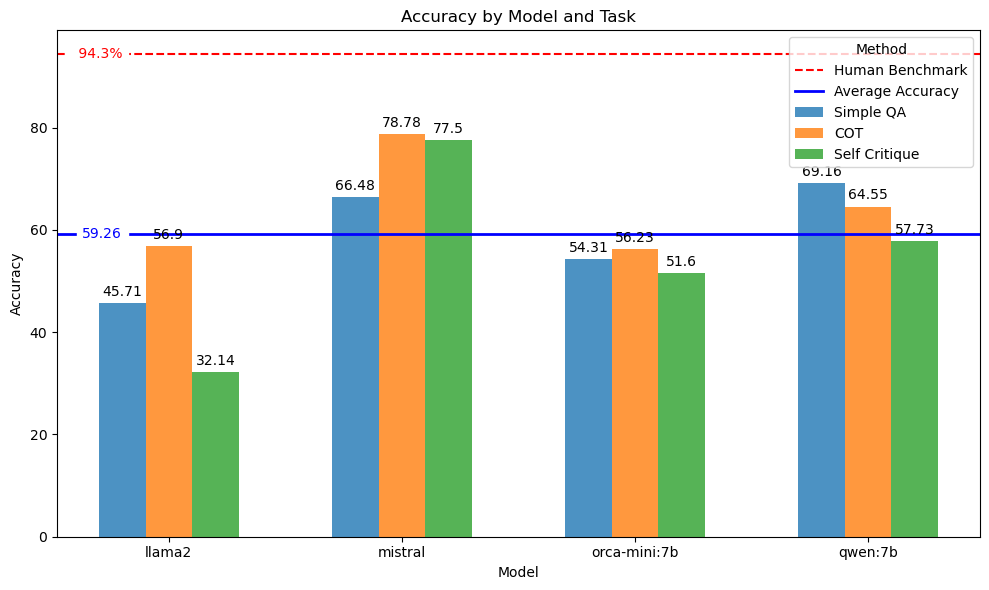

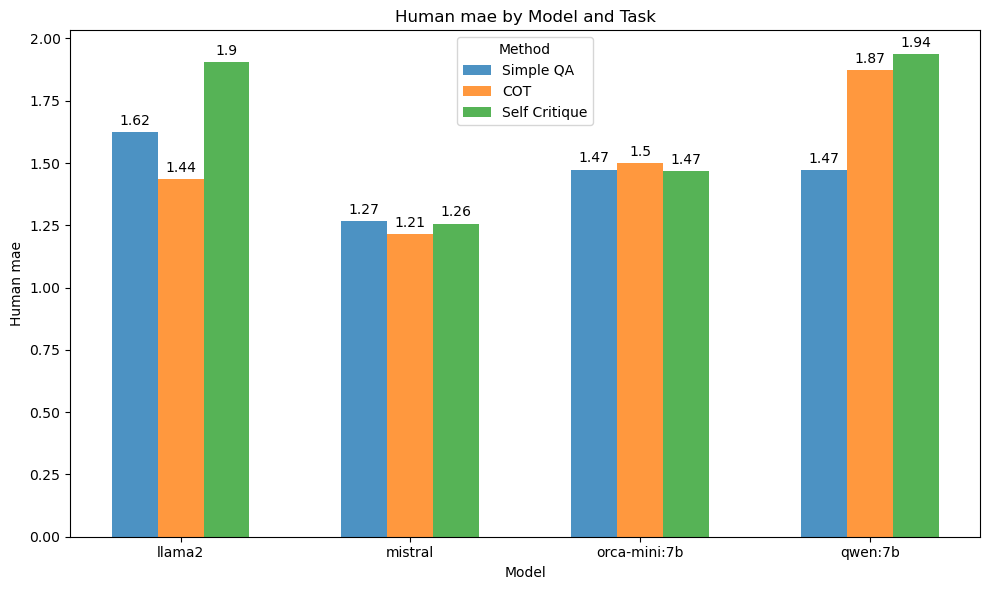

In [259]:
import matplotlib.pyplot as plt
import numpy as np

task_data = transformed_data

models = ['llama2', 'mistral', 'orca-mini:7b', 'qwen:7b']
tasks = list(task_data.keys())

# Function to plot grouped bar charts with bar labels
def plot_grouped_bar_charts_with_labels(data, metric):
    n_models = len(models)
    n_tasks = len(tasks)
    bar_width = 0.2
    opacity = 0.8
    index = np.arange(n_models)

    fig, ax = plt.subplots(figsize=(10, 6))
    all_values = []  # Collecting all values to calculate the average later

    for i, task in enumerate(tasks):
        values = [data[task][model][metric] for model in models]
        positions = [x + bar_width * i for x in index]
        all_values.extend(values)  # Adding values to the all_values list
        bars = ax.bar(positions, values, bar_width, alpha=opacity, label=task)
        # Adding labels to bars
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(round(height,2)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    if(metric == "accuracy"):
        ax.axhline(y=94.3, color='r', linestyle='--', label='Human Benchmark')
        ax.text(0, 94.3, f' {94.3}%', color='r', va='center', ha='right', backgroundcolor='w')
        ax.legend(title='Task')
        
        average_accuracy = np.mean(all_values)
        ax.axhline(y=average_accuracy, color='b', linestyle='-', linewidth=2, label='Average Accuracy')
        ax.text(0, average_accuracy, f'{average_accuracy:.2f}', color='b', va='center', ha='right', backgroundcolor='w')
   
    ax.set_xlabel('Model')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f'{metric.capitalize()} by Model and Task')
    ax.set_xticks(index + bar_width / 2 * (n_tasks - 1))
    ax.set_xticklabels(models)
    ax.legend(title='Method', loc="best")
    plt.tight_layout()
    plt.savefig(f"plausibility results {metric}.png")

#     plt.show()

# Plot Accuracy with labels for each task
plot_grouped_bar_charts_with_labels(task_data, 'accuracy')

# Plot Human MAE with labels for each task
plot_grouped_bar_charts_with_labels(task_data, 'human mae')
